<a href="https://colab.research.google.com/github/shebegyare131/shebegyare131/blob/main/Turbidity%20data%20analysis%20_Using_FBprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import random
import seaborn as sns
from fbprophet import Prophet

In [132]:
#df=pd.read_csv('WW.csv')
#df.head()

import pandas as pd


def remove_timezone_label(data):

    pos = data.index('+00:00')

    # Slice data to get rid of the tz, then strip leading/trailing whitespace
    data = (data[:pos]).strip()

    return data


if __name__ == '__main__':
    df=pd.read_csv("WW.csv")

    # the apply() function is used to carry out a function on the data.
    df["created_at"] = df["created_at"].apply(remove_timezone_label)

    df.to_csv("WW_NEW.csv", index=False)

In [133]:
df.head()

,created_at,entry_id,Temperature,PH,Turbidity,flow,TDS,Pressure,Volume,Color
0,2022-03-27T15:07:07,1,29.19,7.11,0.0,2,0.0,96.75,84.34,64
1,2022-03-27T15:07:34,2,29.19,7.13,0.0,1,0.0,61.16,84.35,64
2,2022-03-27T15:07:53,3,29.19,7.13,0.0,1,0.0,63.35,1.16,64
3,2022-03-27T15:08:24,4,29.12,7.15,0.0,1,0.0,69.43,84.35,64
4,2022-03-27T15:08:40,5,29.19,7.14,0.0,2,0.0,69.43,84.36,64


In [134]:
df=df.drop(['Temperature'],axis=1)
df=df.drop(['PH'],axis=1)
#df=df.drop(['Turbidity'],axis=1)
df=df.drop(['flow'],axis=1)
df=df.drop(['TDS'],axis=1)
df=df.drop(['Pressure'],axis=1)
df=df.drop(['Volume'],axis=1)
df=df.drop(['Color'],axis=1)
df=df.drop(['entry_id'],axis=1)
df.head(200)

,created_at,Turbidity
0,2022-03-27T15:07:07,0.0
1,2022-03-27T15:07:34,0.0
2,2022-03-27T15:07:53,0.0
3,2022-03-27T15:08:24,0.0
4,2022-03-27T15:08:40,0.0
...,...,...
195,2022-03-27T17:06:30,100.0
196,2022-03-27T17:15:42,100.0
197,2022-03-27T17:16:01,100.0
198,2022-03-27T17:16:18,100.0


In [ ]:
#Load Data
df=pd.read_csv("HQQ.csv")
#url = 'https://api.foodsecurityportal.org/en/datastore/dump/1daac0af-9c6c-5b9f-b879-5dbb42f2d4b5'
#df = pd.read_csv(url)
df.head(10)

In [ ]:
#df = df.drop(['PH'], axis=1)
df = df.drop(['Oxygen Consumption'], axis=1)
df = df.drop(['Ammonia Nitrogen'], axis=1)
#df = df.drop(['commodity'], axis=1)
df = df.drop(['Dissolved Oxygen'], axis=1)
#df = df.drop(['source_name'], axis=1)
#df = df.drop(['source_url'], axis=1)
#df = df.drop(['minPrice'], axis=1)
#df = df.drop(['maxPrice'], axis=1)
#df = df.drop(['percentageChange'], axis=1)
#df = df.drop(['last_sync'], axis=1)
#df = df.drop(['Oxygen Consumption'], axis=1) 
#df = df.drop(['timestamp'], axis=1)


df.head()

In [135]:
df.tail()

,created_at,Turbidity
60164,2022-04-12T18:10:02,118.26
60165,2022-04-12T18:10:18,118.26
60166,2022-04-12T18:10:34,118.26
60167,2022-04-12T18:10:50,118.26
60168,2022-04-12T18:11:06,118.26


In [136]:
df.isnull().sum()

created_at    0
Turbidity     0
dtype: int64

In [137]:
df.shape

(60169, 2)

In [138]:
#conversion_rate = 85.33
#df['price'] = conversion_rate * df['price']
#df.head()

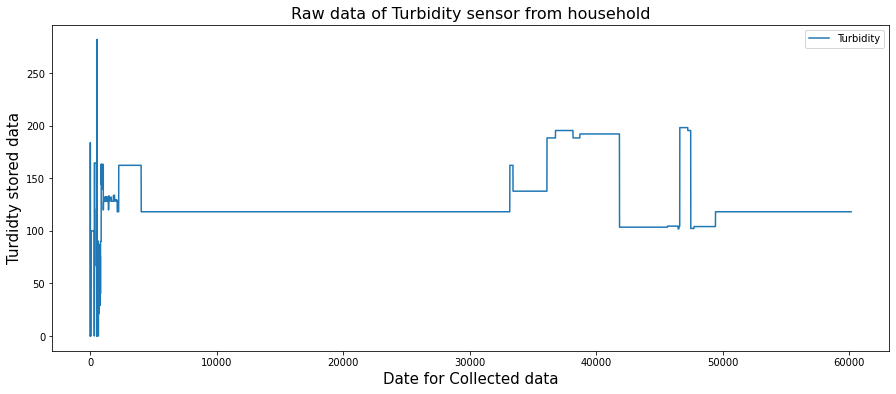

In [105]:
df.plot(figsize=(15, 6))
plt.title("Raw data of Turbidity sensor from household", fontsize=16)
plt.ylabel("Turdidty stored data", fontsize=15)
plt.xlabel("Date for Collected data", fontsize=15)
plt.show()

In [106]:
df.columns = ['ds', 'y'] #required by fbprophet
df.head()

,ds,y
0,2022-03-27T15:07:07,0.0
1,2022-03-27T15:07:34,0.0
2,2022-03-27T15:07:53,0.0
3,2022-03-27T15:08:24,0.0
4,2022-03-27T15:08:40,0.0


In [107]:
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,2022-03-27 15:07:07,0.0
1,2022-03-27 15:07:34,0.0
2,2022-03-27 15:07:53,0.0
3,2022-03-27 15:08:24,0.0
4,2022-03-27 15:08:40,0.0


In [108]:
df = df.sort_values(by='ds')
df

,ds,y
0,2022-03-27 15:07:07,0.00
1,2022-03-27 15:07:34,0.00
2,2022-03-27 15:07:53,0.00
3,2022-03-27 15:08:24,0.00
4,2022-03-27 15:08:40,0.00
...,...,...
60164,2022-04-12 18:10:02,118.26
60165,2022-04-12 18:10:18,118.26
60166,2022-04-12 18:10:34,118.26
60167,2022-04-12 18:10:50,118.26


In [109]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [110]:
model = Prophet()

In [111]:
df.columns

Index(['ds', 'y'], dtype='object')

In [112]:
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [113]:
model.component_modes

{'additive': ['weekly',
  'daily',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [114]:
df.tail()

,ds,y
60164,2022-04-12 18:10:02,118.26
60165,2022-04-12 18:10:18,118.26
60166,2022-04-12 18:10:34,118.26
60167,2022-04-12 18:10:50,118.26
60168,2022-04-12 18:11:06,118.26


In [115]:
future_dates = model.make_future_dataframe(periods=180)

In [116]:
future_dates.tail()

,ds
60344,2022-10-05 18:11:06
60345,2022-10-06 18:11:06
60346,2022-10-07 18:11:06
60347,2022-10-08 18:11:06
60348,2022-10-09 18:11:06


In [117]:
pred = model.predict(future_dates)
pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-03-27 15:07:07,-12.257184,55.661292,88.570497,-12.257184,-12.257184,84.471311,84.471311,84.471311,-0.650765,-0.650765,-0.650765,85.122077,85.122077,85.122077,0.0,0.0,0.0,72.214127
1,2022-03-27 15:07:34,-12.193934,55.618836,87.923897,-12.193934,-12.193934,84.458937,84.458937,84.458937,-0.639359,-0.639359,-0.639359,85.098296,85.098296,85.098296,0.0,0.0,0.0,72.265003
2,2022-03-27 15:07:53,-12.149425,57.405625,89.280746,-12.149425,-12.149425,84.450253,84.450253,84.450253,-0.631309,-0.631309,-0.631309,85.081562,85.081562,85.081562,0.0,0.0,0.0,72.300828
3,2022-03-27 15:08:24,-12.076805,56.939821,88.951069,-12.076805,-12.076805,84.436126,84.436126,84.436126,-0.618132,-0.618132,-0.618132,85.054258,85.054258,85.054258,0.0,0.0,0.0,72.359321
4,2022-03-27 15:08:40,-12.039324,57.671160,89.515974,-12.039324,-12.039324,84.428855,84.428855,84.428855,-0.611311,-0.611311,-0.611311,85.040165,85.040165,85.040165,0.0,0.0,0.0,72.389531


In [118]:
#pred = pred[['ds', 'yhat']]
#pred

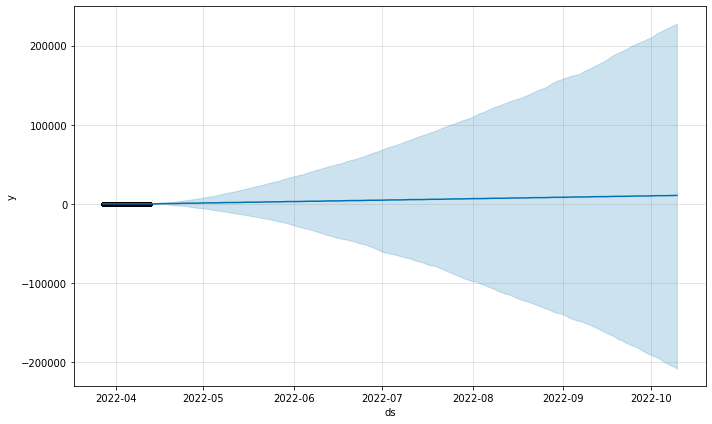

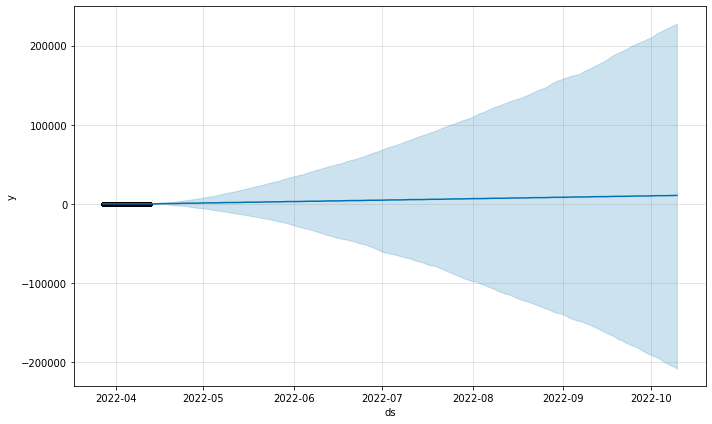

In [119]:
model.plot(pred)

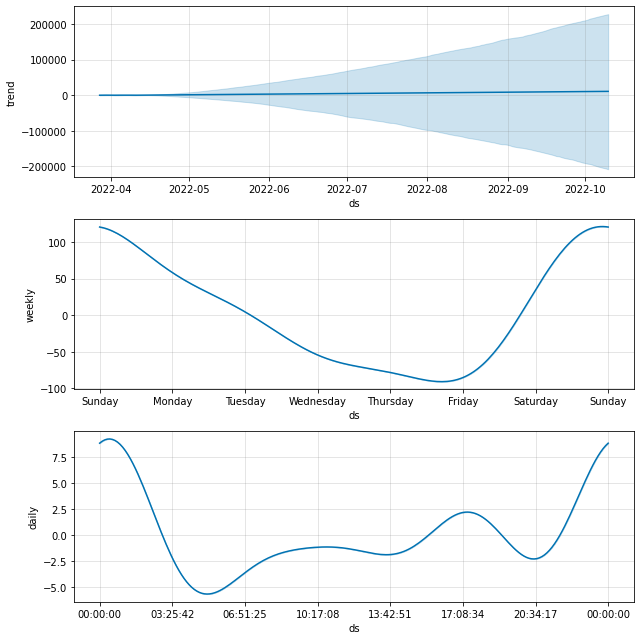

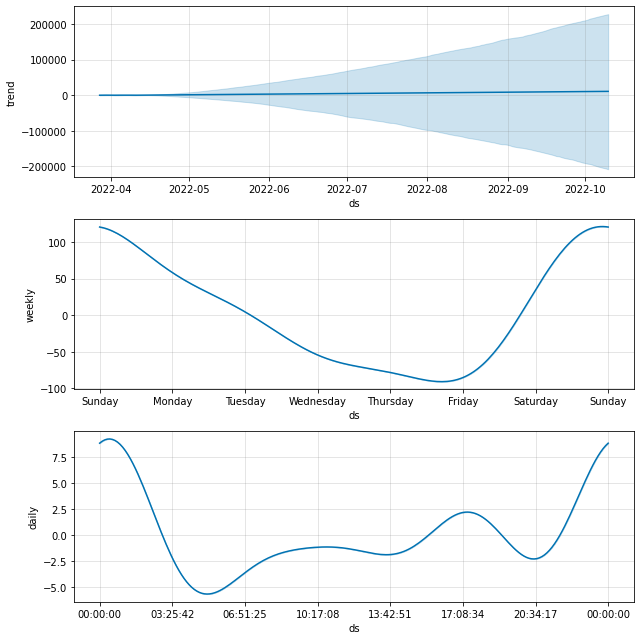

In [120]:
model.plot_components(pred)

In [121]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='9 days', period='6 days', horizon='3 days')
#df_cv = cross_validation(model, initial='365 days', period='90 days', horizon='180 days')
df_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2022-04-09 18:11:06 and 2022-04-09 18:11:06


  0%|          | 0/1 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-04-09 21:35:48,142.545782,121.936126,162.975148,101.98,2022-04-09 18:11:06
1,2022-04-09 21:36:04,142.554062,121.980952,162.552353,101.98,2022-04-09 18:11:06
2,2022-04-09 21:36:20,142.562366,121.149414,162.257861,101.98,2022-04-09 18:11:06
3,2022-04-09 21:36:38,142.571737,120.588554,163.636462,101.98,2022-04-09 18:11:06
4,2022-04-09 21:36:54,142.580091,123.418787,160.826274,101.98,2022-04-09 18:11:06


In [122]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,0 days 09:52:40,2156.187901,46.434770,45.885083,0.294870,0.263636,0.193407
1,0 days 09:52:56,2155.636900,46.428837,45.877263,0.294788,0.263636,0.194139
2,0 days 09:53:12,2155.084285,46.422885,45.869418,0.294707,0.263636,0.194872
3,0 days 09:53:28,2154.530056,46.416916,45.861548,0.294625,0.263636,0.195604
4,0 days 09:53:43,2153.974221,46.410928,45.853653,0.294543,0.263636,0.196337


/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


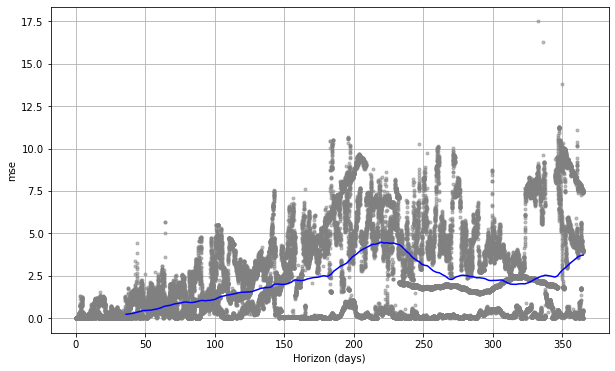

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mse')

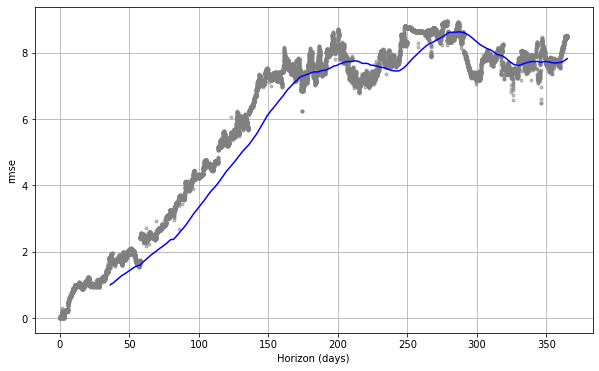

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

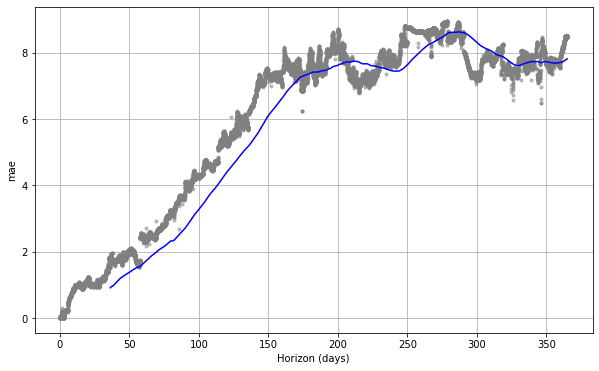

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mae')

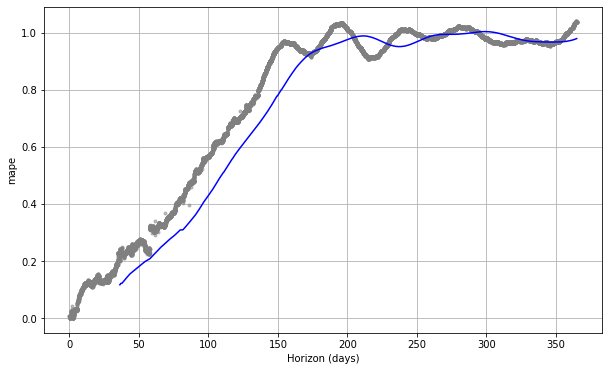

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

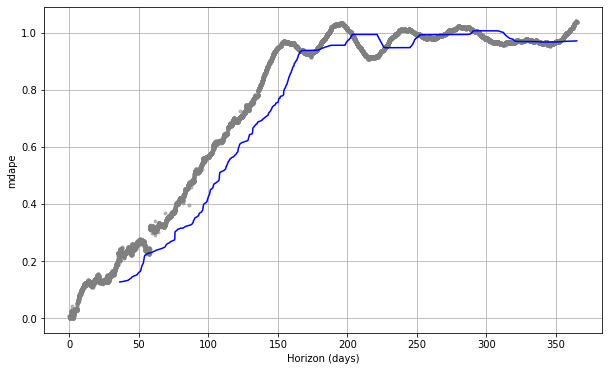

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mdape')